Moderating Structural Equation Modeling / MSEM dengan pendekatan PLS dapat dikerjakan dengan beberapa metode, diantaranya adalah dengan menggunakan i) Product Indicator Approach, ii) a Two-Stage Path Modeling Approach, iii) a Two-Stage Regression Approach, iv) a Categorical Variable Approach. Konsep dalam MSEM yaitu menguji variabel laten (M) yang berperan sebagai variabel moderating.
![image](https://user-images.githubusercontent.com/36166387/85215148-b3256b00-b39e-11ea-953b-420bc6f6422d.png)

### MSEM PLS - Product Indicator Approach
Konsep metode ini dengan membentuk variabel laten baru "Interaksi", dimana indikator dari variabel laten interaksi adalah hasil perkalian antara indikator variabel laten eksogen dengan indikator variabel laten yang diduga sebagai moderator. Pada kasus dibawah ini variabel laten image diduga sebagai variabel moderator, yaitu variabel laten yang dapat memperlemah atau memperkuat pengaruh variabel laten satisfaction ke variabel laten loyalty. Berikut konseptual path diagramnya :
![image](https://user-images.githubusercontent.com/36166387/85215160-d5b78400-b39e-11ea-98fa-d08b116289a2.png)

In [1]:
library("plspm")

In [2]:
data(satisfaction)
head(satisfaction)
dim(satisfaction) # data terdiri dari n = 250 dengan 28 indikator 

,imag1,imag2,imag3,imag4,imag5,expe1,expe2,expe3,expe4,expe5,...,val4,sat1,sat2,sat3,sat4,loy1,loy2,loy3,loy4,gender
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,8,8,9,5,6,9,9,5,8,9,...,6,6,7,6,7,9,9,6,6,male
2,9,9,10,9,7,9,8,10,8,9,...,8,8,7,8,7,8,9,8,8,female
3,9,8,8,8,8,8,8,8,9,9,...,8,9,8,8,8,9,8,9,9,female
4,8,9,8,9,7,10,6,3,10,10,...,4,7,7,7,6,6,6,5,5,male
5,10,10,8,10,8,7,9,8,9,8,...,8,8,8,8,7,8,9,9,9,female
6,7,8,8,8,8,8,8,8,9,10,...,5,7,6,6,7,7,8,8,7,female


[1] 250  28

Terdapat 5 indikator untuk variabel laten image, yang diduga sebagai mederator. Kemudian juga diketahui terdapat 4 indikator satisfaction, maka untuk langkah selanjutnya adalah membuat indikator dari variabel laten interakasi. Indikator variabel laten interaksi didapatkan dengan mengalikan indikator dari variabel laten image dengan indikator dari variabel laten satisfaction. Sesuai dengan konseptual path diagram / diagram jalur diatas, dalam kasus ini akan digunakan indikator imag1-imag3 dan sat1-sat3.

In [3]:
# membuat indikator interaksi
satisfaction1 = satisfaction
ncol(satisfaction1) #cek struktur kolom dari dataset awal

[1] 28

In [4]:
# membangkitkan data indikator interaksi
satisfaction1$inter1 = satisfaction$imag1 * satisfaction$sat1
satisfaction1$inter2 = satisfaction$imag1 * satisfaction$sat2
satisfaction1$inter3 = satisfaction$imag1 * satisfaction$sat3
satisfaction1$inter4 = satisfaction$imag2 * satisfaction$sat1
satisfaction1$inter5 = satisfaction$imag2 * satisfaction$sat2
satisfaction1$inter6 = satisfaction$imag2 * satisfaction$sat3
satisfaction1$inter7 = satisfaction$imag3 * satisfaction$sat1
satisfaction1$inter8 = satisfaction$imag3 * satisfaction$sat2
satisfaction1$inter9 = satisfaction$imag3 * satisfaction$sat3

In [6]:
ncol(satisfaction1) # cek update data baru, struktur data kolom bertambah 9 mejadi 37 kolom

[1] 37

In [7]:
# Membentuk path matrik, menunjukkan pola pengaruh antar variabel laten
r1 = c(0, 0, 0, 0)
r2 = c(0, 0, 0, 0)
r3 = c(0, 0, 0, 0)
r4 = c(1, 1, 1, 0)
path = rbind(r1,r2,r3,r4) #setting matrik berdasarkan ordo baris
# penamaan matrik baris dan kolom
rownames(path) = c("Image", "Inter", "Satisfaction", "Loyalty")
colnames(path) = c("Image", "Inter", "Satisfaction", "Loyalty")
# menentukan blok indikator yang digunakan dalam outer model
blok_indikator = list(1:3, 29:37, 20:22, 24:26)
# tipe reflektif
mode_indikator = rep("A", 4)
# running pls dengan bootstrap 200
msempls1 = plspm(satisfaction1, path, blok_indikator, mode_indikator, boot.val = TRUE, br = 200)

In [8]:
# cek path coeficient / koefisien jalur, menunjukkan pengaruh antar variabel laten
msempls1$path_coefs

,Image,Inter,Satisfaction,Loyalty
Image,0.000000,0.00000000,0.0000000,0
Inter,0.000000,0.00000000,0.0000000,0
Satisfaction,0.000000,0.00000000,0.0000000,0
Loyalty,0.299946,-0.04576237,0.5225669,0


In [10]:
# hasil diatas menunjukkan koefisisen jallur yang bertanda negatif, kemudian akan kita cek tingkat signifikansinya dengan br 200

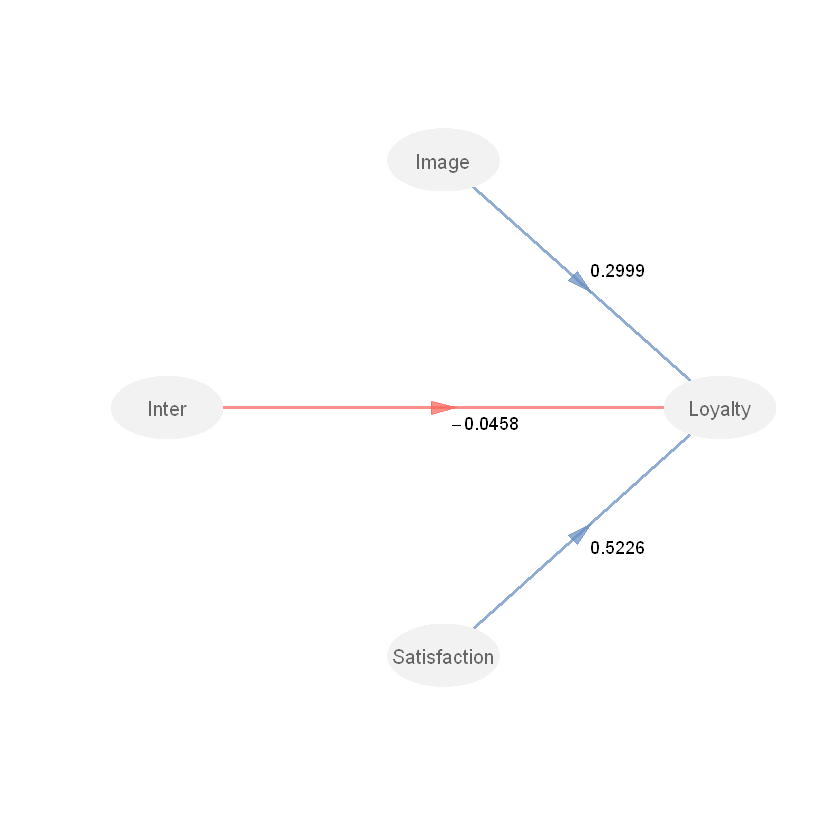

In [9]:
plot(msempls1)

In [11]:
msempls1$boot$paths # signifikansi koefisien jalur pengaruh antar variabel laten

,Original,Mean.Boot,Std.Error,perc.025,perc.975
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Image -> Loyalty,0.29994601,0.32581347,0.1273985,0.1168312,0.5628287
Inter -> Loyalty,-0.04576237,-0.08895286,0.2134899,-0.5379880,0.3035503
Satisfaction -> Loyalty,0.52256693,0.54456715,0.1421310,0.2505289,0.7972997


Hasil diatas menunjukkan bahwa pada selang interval 95% didapatkan pengaruh interaksi / Inter terhadap Loyalty melewati nilai 0. Sehingga disimpulkan Image bukan merupakan variabel moderator yang mempengaruhi pengaruh variabel laten Satifaction terhadap Loyalty.

### MSEM PLS - Two-Stage Path Modeling Approach
Konsep moderating dalam pendekatan ini adalah dengan mencari nilai skor faktor SEM PLS terlebih dahulu, setelah itu dengan melakukan perkalian skor faktor dari variabel laten yang berperan sebagai moderator dengan variabel laten eksogen. Berikut adalah konseptual path diagram / diagram jalurnya.
![image](https://user-images.githubusercontent.com/36166387/85215172-03043200-b39f-11ea-9335-930e227d7715.png)

![image](https://user-images.githubusercontent.com/36166387/85215179-216a2d80-b39f-11ea-820f-8455ac538d21.png)

In [26]:
# langkah pertama : lakukan SEM PLS dan kemudian mendapatkan nilai skor faktor dari masing-masing variabel laten

# Membentuk path matrik, menunjukkan pola pengaruh antar variabel laten
f1 = c(0, 0, 0)
f2 = c(0, 0, 0)
f3 = c(1, 1, 0)
path1 = rbind(f1, f2, f3) #setting matrik berdasarkan ordo baris
# penamaan matrik baris
rownames(path1) = c("Image", "Satisfaction", "Loyalty")

# menentukan blok indikator yang digunakan dalam outer model
blok_indikator1 = list(1:3, 20:22, 24:26)

mode_indikator1 = rep("A", 3)
# running pls dengan bootstrap dafault
msempls1 = plspm(satisfaction, path1, blok_indikator1, mode_indikator1, boot.val = TRUE)


In [27]:
# Mendapatkan nilai skor faktor
Skor = as.data.frame(msempls1$scores)

# Membentuk indikator dan variabel laten interaksi berdasarkan nilai skor faktor diatas
Skor$Inter = Skor$Image * Skor$Satisfaction
head(Skor, n = 5)

,Image,Satisfaction,Loyalty,Inter
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3362603,-0.34526150,0.4094146,-0.116097737
2,0.9700349,0.39696853,0.5685805,0.385073343
3,0.2747367,0.79595562,0.7570823,0.218678231
4,0.3184179,0.02585351,-0.6876517,0.008232222
5,0.8906690,0.58824907,0.7321784,0.523935196


In [28]:
# Langkah kedua : membentuk MSEM PLS
path2 = matrix(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0),
              nrow = 4, ncol = 4, byrow = TRUE)
rownames(path2) = c("Image", "Inter", "Satisfaction", "Loyalty")
colnames(path2) = c("Image", "Inter", "Satisfaction", "Loyalty")

# menentukan blok indikator yang digunakan dalam outer model
blok_indikator2 = list(1, 4, 2, 3)

mode_indikator2 = rep("A", 4)

# running pls dengan bootstrap br = 200
msempls2 = plspm(Skor, path2, blok_indikator2, mode_indikator2, boot.val = TRUE,
                br = 200)

In [29]:
# cek signifikansi pada bootstrap
round(msempls2$boot$paths, 4)

,Original,Mean.Boot,Std.Error,perc.025,perc.975
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Image -> Loyalty,0.2769,0.2721,0.0597,0.1687,0.3948
Inter -> Loyalty,-0.0005,-0.0016,0.0482,-0.0929,0.0875
Satisfaction -> Loyalty,0.4957,0.5013,0.0697,0.3648,0.6359


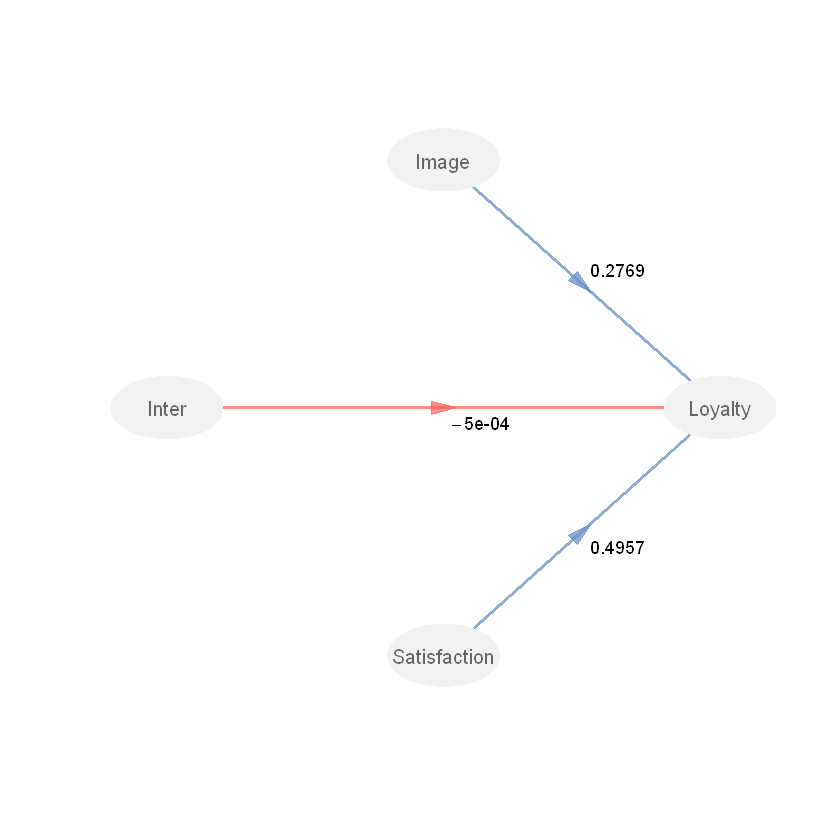

In [30]:
plot(msempls2)

Hasil diatas menunjukkan bahwa pada selang interval 95% didapatkan pengaruh interaksi / Inter terhadap Loyalty melewati nilai 0. Sehingga disimpulkan Image bukan merupakan variabel moderator yang mempengaruhi pengaruh variabel laten Satifaction terhadap Loyalty.

### MSEM PLS - Two-Stage Regression Approach
Konsep dari metode ini yaitu melakukan analisis regresi linier berganda dengan data yang didapatkan dari SEM PLS.

![image](https://user-images.githubusercontent.com/36166387/85215195-4e1e4500-b39f-11ea-8228-e192af94793c.png)

In [31]:
# Langkah pertama yaitu melakukan analisis SEM PLS, tujuannya untuk mendapatkan nilai skor faktor
# Membentuk path matrik, menunjukkan pola pengaruh antar variabel laten
f1 = c(0, 0, 0)
f2 = c(0, 0, 0)
f3 = c(1, 1, 0)
regpath = rbind(f1, f2, f3) #setting matrik berdasarkan ordo baris
# penamaan matrik baris
rownames(regpath) = c("Image", "Satisfaction", "Loyalty")

# menentukan blok indikator yang digunakan dalam outer model
regblok_indikator = list(1:3, 20:22, 24:26)

regmode_indikator = rep("A", 3)
# running pls dengan bootstrap dafault
regmsempls = plspm(satisfaction, regpath, regblok_indikator, regmode_indikator, boot.val = TRUE)

In [32]:
# Langkah kedua melakukan analisis regresi berdasarkan data skor faktor hasil dari SEM PLS
regskor = as.data.frame(regmsempls$scores)

In [33]:
# membangun indikator interaksi
regskor$Inter = regskor$Image * regskor$Satisfaction
head(regskor, n = 5)

,Image,Satisfaction,Loyalty,Inter
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3362603,-0.34526150,0.4094146,-0.116097737
2,0.9700349,0.39696853,0.5685805,0.385073343
3,0.2747367,0.79595562,0.7570823,0.218678231
4,0.3184179,0.02585351,-0.6876517,0.008232222
5,0.8906690,0.58824907,0.7321784,0.523935196


In [39]:
# melakukan analisis regresi
reg = lm(Loyalty ~ Image + Inter + Satisfaction - 1, data = regskor)
summary(reg)


Call:
lm(formula = Loyalty ~ Image + Inter + Satisfaction - 1, data = regskor)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2835 -0.3932  0.0821  0.4275  2.6245 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
Image         0.2769506  0.0582104   4.758 3.33e-06 ***
Inter        -0.0002456  0.0299314  -0.008    0.993    
Satisfaction  0.4957667  0.0599154   8.274 8.09e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7177 on 247 degrees of freedom
Multiple R-squared:  0.4911,	Adjusted R-squared:  0.485 
F-statistic: 79.46 on 3 and 247 DF,  p-value: < 2.2e-16


In [40]:
# plot path diagram / diagram jalur
c1 = c(0, 0, 0, 0)
c2 = c(0, 0, 0, 0)
c3 = c(0, 0, 0, 0)
c4 = c(reg$coefficients, 0)
reg_path = rbind(c1, c2, c3, c4)
rownames(reg_path) = c("Image", "Inter", "Satisfaction", "Loyalty")
colnames(reg_path) = c("Image", "Inter", "Satisfaction", "Loyalty")

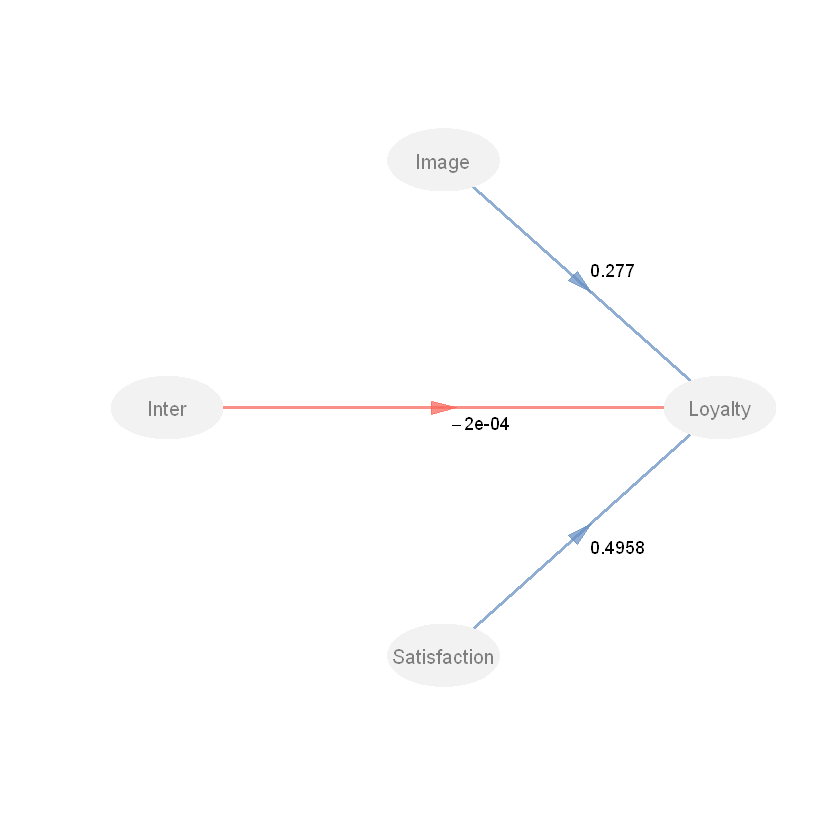

In [41]:
innerplot(reg_path, show.values = TRUE)

Hasil diatas menunjukkan bahwa  pengaruh interaksi / Inter terhadap Loyalty tidak signifikan (0.993 > alpha = 0,05). Sehingga disimpulkan Image bukan merupakan variabel moderator yang mempengaruhi pengaruh variabel Satifaction terhadap Loyalty.

### MSEM PLS - Categorical Variable Approach ?
